# Capstone II: Craiglist Used Car Dataset
### Part 4: Model Development - Step II
Biman Mondal

May 26, 2025

Original Dataset .csv file downloaded from Kaggle:

https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

This notebook outlines CL Used Car Dataset Part 4 (Model Development), step 2. This notebook will attempt to create several models with the cleaned dataset created in the notebook in step 1 and their prediction metrics compared. 

The objective of the analysis is to use the dataset to predict vehicle price (target) using the other features in the dataset like vehicel: ('year', 'odometer', 'manufacturer', and 'model').


In [2]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns
# Import missingno package
import missingno as msno
# Import time
import time
# Import category encoder
import category_encoders as ce

# Modeling
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer


In [3]:
# Read Dataframe
vehicles = pd.read_csv('./data/vehicles_processed.csv', header='infer',index_col='id')

In [4]:
#vehicles.head(5).T
#vehicles.info()
print(vehicles.shape)

(134609, 12)


In [5]:
# OHE the cetgorical datadata
encoder = ce.OneHotEncoder(cols=['manufacturer','model','fuel','title_status','transmission','drive','type'], 
                           use_cat_names=True,
                            return_df=True)
vehicles = encoder.fit_transform(vehicles)
#vehicle_transformed.head()
print(vehicles.shape)

(134609, 968)


#### Sample Linear Regression

In [ ]:
"""
# Import regression modules
import statsmodels.api as sm
X = vehicles.drop('price',axis=1)
X = sm.add_constant(X)
m = sm.OLS(vehicles['price'],X).fit()
# The following is a standard result without any standardization
print(m.summary())
"""

### Split dataset

In [7]:
# Define target variable and independent variables
X = vehicles.drop('price',axis=1)
y = vehicles['price'] 

# Split dataset 80% train, 20% Test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size = 0.80,
                                                random_state = 42)

### Linear Regression with Sklearn

In [9]:
#
start_time = time.perf_counter()

# Perform LR with SKlearn
lreg = LinearRegression()
lreg.fit(Xtrain,ytrain)
ypred_lr = lreg.predict(Xtest)
# The R^2 values is nearly the same as the stats model
print(f"Train R^2: {lreg.score(Xtrain, ytrain):.3} \nTest R^2: {lreg.score(Xtest, ytest):.3}")
print(f"Linear regression mean absolute percent error is: {round(MAPE(ytest, ypred_lr),2)}.")

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

Train R^2: 0.752 
Test R^2: 0.761
Linear regression mean absolute percent error is: 2.71.
Elapsed time: 0.122 minutes.


#### Perform LR with Cross-validation

In [10]:
#
start_time = time.perf_counter()

lr = LinearRegression()
cv_results_lr =  cross_val_score(lr, X, y, cv=5, scoring ='neg_mean_absolute_percentage_error')
print("Linear Regression nMAPE results:")
print(cv_results_lr)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

Linear Regression nMAPE results:
[-2.49700097 -4.31918925 -0.74837646 -3.76870079 -2.55566159]
Elapsed time: 0.641 minutes.


#### Scale Numerical Columns and Run Ridge Regression

In [ ]:
# Transform the numerical data
pt = PowerTransformer(method='yeo-johnson')
# Initialize StandardScaler
scaled_vehicles = vehicles.copy()
numeric_cols = ['year','cylinders','odometer']
# Apply standardization to the selected column
scaled_vehicles[numeric_cols] = pt.fit_transform(scaled_vehicles[numeric_cols])

# Define target variable and independent variables
X_scaled = scaled_vehicles.drop('price',axis=1)
y_scaled = scaled_vehicles['price'] 

# Split dataset 80% train, 20% Test
Xtrain_sc, Xtest_sc, ytrain_sc, ytest_sc = train_test_split(X_scaled, y_scaled,
                                                train_size = 0.80,
                                            random_state = 1)

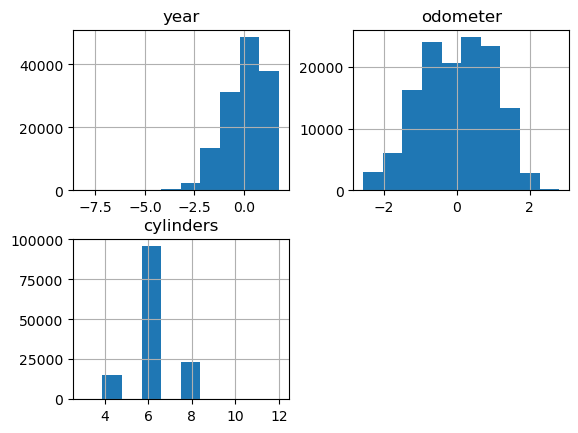

In [41]:
# Plot the normalized data frame
scaled_vehicles[['year','odometer','cylinders']].hist()
plt.show()

In [21]:
#
start_time = time.perf_counter()

for alpha in [0.1, 0.5, 1.0, 5.0, 10.0]:
#
    ridreg = Ridge(alpha=alpha)
    ridreg.fit(Xtrain_sc,ytrain_sc)
    ypred_rid = ridreg.predict(Xtest_sc)
    # The R^2 values is nearly the same as the stats model
    print(f"Train R^2: {ridreg.score(Xtrain_sc, ytrain_sc):.3} \nTest R^2: {ridreg.score(Xtest_sc, ytest_sc):.3}")
    print(f"Ridge regression mean absolute percent error is: {round(MAPE(ytest_sc, ypred_rid),2)}.")


#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

C:\Users\AlexB\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\AlexB\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Train R^2: 0.764 
Test R^2: 0.761
Ridge regression mean absolute percent error is: 2.6.
Train R^2: 0.764 
Test R^2: 0.761
Ridge regression mean absolute percent error is: 2.6.
Train R^2: 0.764 
Test R^2: 0.761
Ridge regression mean absolute percent error is: 2.6.
Train R^2: 0.763 
Test R^2: 0.76
Ridge regression mean absolute percent error is: 2.61.
Train R^2: 0.76 
Test R^2: 0.757
Ridge regression mean absolute percent error is: 2.62.
Elapsed time: 0.306 minutes.


The results above show that the MAPE increases slightly with increasing alpha with a ridge regression model. So the default alpha=0.1 will be used.

#### Run Cross validation with Ridge

In [39]:
#
start_time = time.perf_counter()

#pipeline = Pipeline([
#    ('transform', PowerTransformer(method='yeo-johnson')),  # Fitted per fold
#    ('model', Ridge(alpha=0.1))
#])

ridreg = Ridge(alpha=0.1)
cv_results_ridge =  cross_val_score(ridreg, X_scaled, y_scaled, cv=5, scoring='neg_mean_absolute_percentage_error')
print("Ridge Regression nMAPE results:")
print(cv_results_ridge)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")


Ridge Regression nMAPE results:
[-2.53922216 -4.27506568 -0.70988974 -3.71981286 -2.55397293]
Elapsed time: 0.513 minutes.


The results above show that by normalizing the data doesn't have any effect

### Log Regression with Sklearn

In [ ]:
"""
#
start_time = time.perf_counter()

logreg = LogisticRegression()
logreg.fit(Xtrain,ytrain)
ypred_logreg = logreg.predict(Xtest)

# The R^2 values is nearly the same as the stats model
print(f"Train R^2: {logreg.score(Xtrain, ytrain):.3} \nTest R^2: {logreg.score(Xtest, ytest):.3}")
print(f"Logistic regression mean absolute percent error is: {round(MAPE(ytest, ypred_logreg),2)}.")

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")
"""

In [ ]:
"""
#
start_time = time.perf_counter()

logreg = LogisticRegression()
cv_results_logreg = cross_val_score(logreg, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
print("Logistic Regression nMAPE results:")
print(cv_results_logreg)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")
"""

### Random Forest Regression

In [ ]:
#
start_time = time.perf_counter()

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(Xtrain, ytrain)
ypred_rf = rf.predict(Xtest)

# Print R^2 for fit
print("RF - Train R²:", np.round(rf.score(Xtrain, ytrain),3))
#print("RF - Test R²:", np.round(rf.score(Xtest, ytest),3))
# Mean absolute percentage error
print(f"RF mean absolute percent error is: {round(MAPE(ytest, ypred_rf),2)}.")

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

#### Perform CrossValidation with RF

In [24]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  regressors on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap

In [35]:
#
start_time = time.perf_counter()

rf = RandomForestRegressor(n_jobs=-1, n_estimators=75,max_depth=10)
cv_results_rf = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
print("RF nMAPE results:")
print(cv_results_rf)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

RF nMAPE results:
[-2.18958086 -4.36594845 -0.71977543 -3.66768624 -2.53901742]
Elapsed time: 4.308 minutes.


### Perfom KNN regression

In [ ]:
# Set k=2
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(Xtrain, ytrain)
ypred_knn = knn.predict(Xtest)

# Print R^2 for fit
print("KNN Train R²:", np.round(knn.score(Xtrain, ytrain),3))
print("KNN Test R²:", np.round(knn.score(Xtest, ytest),3))
# Mean absolute percentage error
print(f"KNN mean absolute percent error is: {round(MAPE(ytest, ypred_knn),2)}.")


In [28]:
#
start_time = time.perf_counter()

knn = KNeighborsRegressor(n_neighbors=1,  n_jobs=-1)
cv_results_knn = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
print("KNN nMAPE results:")
print(cv_results_knn)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

KNN nMAPE results:
[-2.28548853 -1.20740193 -0.57732343 -1.85364481 -1.70714625]
Elapsed time: 7.189478066666667 minutes.


#### GridSearch with KNN

In [ ]:
#
start_time = time.perf_counter()

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)
myscore = 'neg_mean_absolute_percentage_error'
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring=myscore, return_train_score=False, n_jobs=-1)
grid_knn.fit(X, y)
# Get the best parameters and score
print("Best parameters found: ", grid_knn.best_params_)
print("Best cross-validation score: ", grid_knn.best_score_)

#
end_time = time.perf_counter()
print(f"Elapsed time: {round((end_time - start_time)/60,3)} minutes.")

### Summarize Model Results

In [37]:
# Combine results into a dataframe
resdf = pd.DataFrame(columns=['Linear Regression','Ridge Regression','Random Forest','KNN'])
resdf.iloc[:,0] = cv_results_lr
resdf.iloc[:,1] = cv_results_ridge
resdf.iloc[:,2] = cv_results_rf
resdf.iloc[:,3] = cv_results_knn
resdf

,Linear Regression,Ridge Regression,Random Forest,KNN
0,-2.497001,-2.539222,-2.189581,-2.285489
1,-4.319189,-4.275066,-4.365948,-1.207402
2,-0.748376,-0.70989,-0.719775,-0.577323
3,-3.768701,-3.719813,-3.667686,-1.853645
4,-2.555662,-2.553973,-2.539017,-1.707146


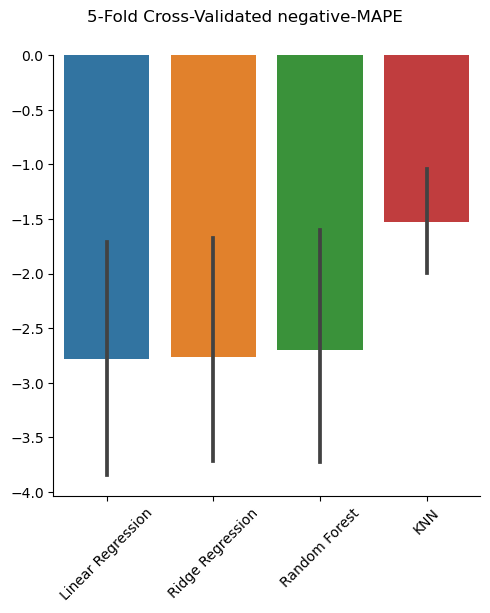

In [38]:
#g = sns.catplot(data=mydf,kind='box',whis=[0,100])
g = sns.catplot(data=resdf,kind='bar')
g.fig.suptitle('5-Fold Cross-Validated negative-MAPE', y=1.05)
g.tick_params(axis='x', labelrotation=45)
plt.show()

### Summary

Modeling outcomes:

In this notebook, the finalized subset and wrangled car dataset has been modeled using several machine learning models to predict the price of an used vehicle. Negative mean absolute percent error  metric was used to compare the model performance is  because it is an intuitive percentage. Since the price is listed in the thousands, the mean squared error leads to a large value. A 5-fold cross validation was performed for each model to determine the variance of the model. A plot of the 5-fold cross validation shows that Random Forest Regression performed the best on average with predicting price however it also took the longest to run. 

Linear regression results are satisfactory and was the fastest to run.  In an effort to improve the linear regression results, the numerical data (year, odometer, and cylinders) were normalized to scale using 'PowerTransformer'. Unfortuantely, this did not have an appreciable effect on reducing the error from.

The Random Forest without specifying parameters (depth, number of estimators) takes the longest to run on the full model but also has the best results. A gridsearch was performed on the KNN model and found the k=1 neighbors yielded minimum error. KNN is the intermediate model, which takes a little longer than the linear regression but also produces lower error than the linear/ridge regression. 

